In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [9]:
# Load the CSV data from data folder
df = pd.read_csv('../data/sierraleone-bumbuna.csv')  # Adjust path as needed
df.head(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
5,2021-10-30 00:06,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.7,NaN
6,2021-10-30 00:07,-0.7,0.0,-0.8,0.0,0.0,22.0,99.4,0.1,0.7,0.2,240.4,0.0,1002,0,0.0,22.3,22.7,NaN
7,2021-10-30 00:08,-0.7,0.0,-0.8,0.0,0.0,22.0,99.5,0.2,0.7,0.4,233.5,1.6,1002,0,0.0,22.4,22.7,NaN
8,2021-10-30 00:09,-0.7,-0.1,-0.8,0.0,0.0,22.0,99.5,0.7,1.1,0.5,232.0,0.3,1002,0,0.0,22.4,22.7,NaN
9,2021-10-30 00:10,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.6,1.1,0.5,232.5,0.3,1002,0,0.0,22.4,22.7,NaN


In [10]:
print(df.describe())
print(df.isna().sum())

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.1000

In [11]:
# Z-score Outlier Detection
for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'RH', 'WS', 'WSgust',
            'WSstdev','WD','WDstdev','BP','Cleaning','Precipitation',
            'TModA','TModB']:
    if col in df.columns:
        df[f'{col}_zscore'] = zscore(df[col].fillna(df[col].median()))
        df = df[df[f'{col}_zscore'].abs() <= 3]

In [12]:
# Fill missing values
df.fillna(df.median(numeric_only=True), inplace=True)

In [13]:
# Save cleaned data
df.to_csv('../data/sierraleone_clean.csv', index=False)

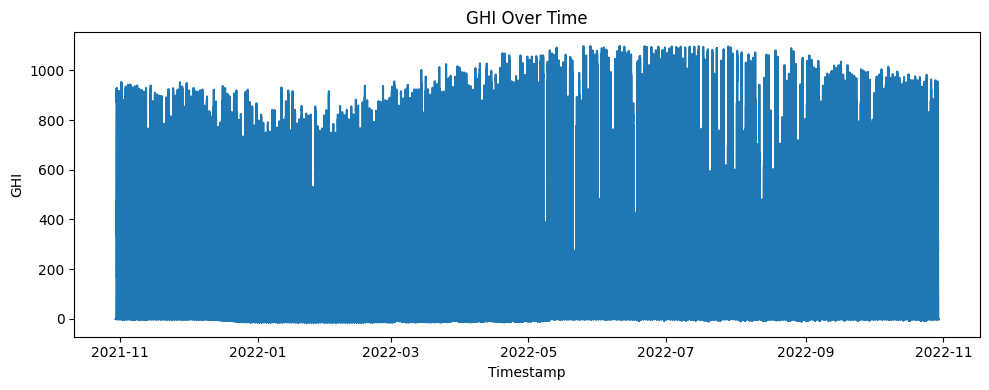

In [14]:
# Plot GHI over time
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    plt.figure(figsize=(10, 4))
    plt.plot(df['Timestamp'], df['GHI'])
    plt.title('GHI Over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('GHI')
    plt.tight_layout()
    plt.show()
